In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download dataframes

In [31]:
dfA1 = pd.read_csv('http://www.ispdados.rj.gov.br/Arquivos/ArmasEstado2000_2006.csv', encoding = "ISO-8859-1", delimiter = ';')
dfA1.columns = ['Year', 'Month', 'Guns']
dfA1.head()

,Year,Month,Guns
0,2000,1,697
1,2000,2,751
2,2000,3,784
3,2000,4,780
4,2000,5,761


In [3]:
dfGuns = pd.read_excel('http://www.ispdados.rj.gov.br/Arquivos/ArmasApreendidasEvolucaoCisp.xlsx', index_col = 0, sheet_name = "Arma_de_Fogo")
dfGuns.head()

,mes,vano,aisp,risp,arma_fabricacao_caseira,carabina,espingarda,fuzil,garrucha,garruchao,metralhadora,outros,pistola,revolver,submetralhadora,total
circ,,,,,,,,,,,,,,,,
1,1,2007,5,1,0,0,0,0,0,0,0,0,0,2,0,2
1,2,2007,5,1,0,0,0,0,0,0,0,0,0,1,0,1
1,3,2007,5,1,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2007,5,1,0,0,0,0,0,0,0,1,4,1,0,6
1,5,2007,5,1,0,0,0,0,6,0,0,0,1,2,0,9


In [4]:
# Clean unnecessary columns
dfA2 = dfGuns.drop(['aisp', 'risp', 'arma_fabricacao_caseira', 'carabina',
       'espingarda', 'fuzil', 'garrucha', 'garruchao', 'metralhadora',
       'outros', 'pistola', 'revolver', 'submetralhadora'], axis=1)
dfA2.head()

,mes,vano,total
circ,,,
1,1,2007,2
1,2,2007,1
1,3,2007,0
1,4,2007,6
1,5,2007,9


In [5]:
# Clean the database and set up total number of guns
dfA2.columns = ['Month', 'Year', 'Guns']
dfA2 = dfA2.groupby(['Year','Month']).sum()
dfA2.reset_index(inplace = True)
dfA2.head()

,Year,Month,Guns
0,2007,1,858
1,2007,2,944
2,2007,3,1054
3,2007,4,950
4,2007,5,1062


# Set up the guns dataframe

In [6]:
# Joining both dataframes to a single dataframe with guns apprehended.
dfA = dfA1.append(dfA2)
print(dfA1.shape)

print(dfA2.shape)

print(dfA.shape)

dfA.head()

(84, 3)
(156, 3)
(240, 3)


,Year,Month,Guns
0,2000,1,697
1,2000,2,751
2,2000,3,784
3,2000,4,780
4,2000,5,761


In [32]:
dfCisp = pd.read_csv('http://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', encoding = "ISO-8859-1", delimiter = ';')
dfCisp.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,...,2,0,0,0,0,0,66,5,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,...,6,0,1,0,0,3,51,9,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,...,2,1,0,0,0,3,64,11,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,...,2,1,0,0,0,6,56,27,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,...,1,3,0,0,0,4,5,23,147,3


# Clean database

In [8]:
# Drop unnecessary columns
dfC = dfCisp.drop(['CISP', 'mes_ano', 'munic', 'AISP', 'RISP', 'mcirc', 'cmp', 'cmba', 'aaapai', 'apf', 'roubo_comercio', 'roubo_residencia',
       'roubo_veiculo', 'roubo_carga', 'roubo_transeunte', 'roubo_em_coletivo',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_celular',
       'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta',
       'outros_roubos', 'furto_veiculos', 'furto_transeunte',
       'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'outros_furtos', 
        'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'fase', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'hom_doloso', 'lesao_corp_morte',
       'latrocinio', 'hom_por_interv_policial', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
        'indicador_letalidade', 'indicador_roubo_rua', 'indicador_roubo_veic', 'Regiao'], axis=1)
dfC.columns

Index(['mes', 'vano', 'total_roubos', 'total_furtos', 'ameaca',
       'registro_ocorrencias'],
      dtype='object')

In [9]:
dfC.columns = ['Month', 'Year', 'Robberies', 'Thefts', 'Threats',
       'Reports']

In [10]:
dfC = dfC.groupby(['Year', 'Month']).sum()

In [11]:
dfC.reset_index(inplace = True)
dfC.head()

,Year,Month,Robberies,Thefts,Threats,Reports
0,2003,1,10296,10483,6127,44793
1,2003,2,10634,10335,6047,45403
2,2003,3,9976,10976,5793,45417
3,2003,4,10222,10409,5626,44184
4,2003,5,10875,10414,5436,45572


# Complete dataframe to use for analysis

In [12]:
# Join both dataframes together for complete stats
df = pd.merge(dfC, dfA, on=['Year', 'Month'])
df.head()

,Year,Month,Robberies,Thefts,Threats,Reports,Guns
0,2003,1,10296,10483,6127,44793,1154
1,2003,2,10634,10335,6047,45403,1324
2,2003,3,9976,10976,5793,45417,1344
3,2003,4,10222,10409,5626,44184,1336
4,2003,5,10875,10414,5436,45572,1292


## Use regression to figure out a connection between guns apprehended and crimes.

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [14]:
x = df[['Guns']]
y = df['Robberies']
lm.fit(x,y)
print(lm.coef_)
print(lm.intercept_)

[-3.86370717]
15474.57824964703


In [15]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

# Regression plot

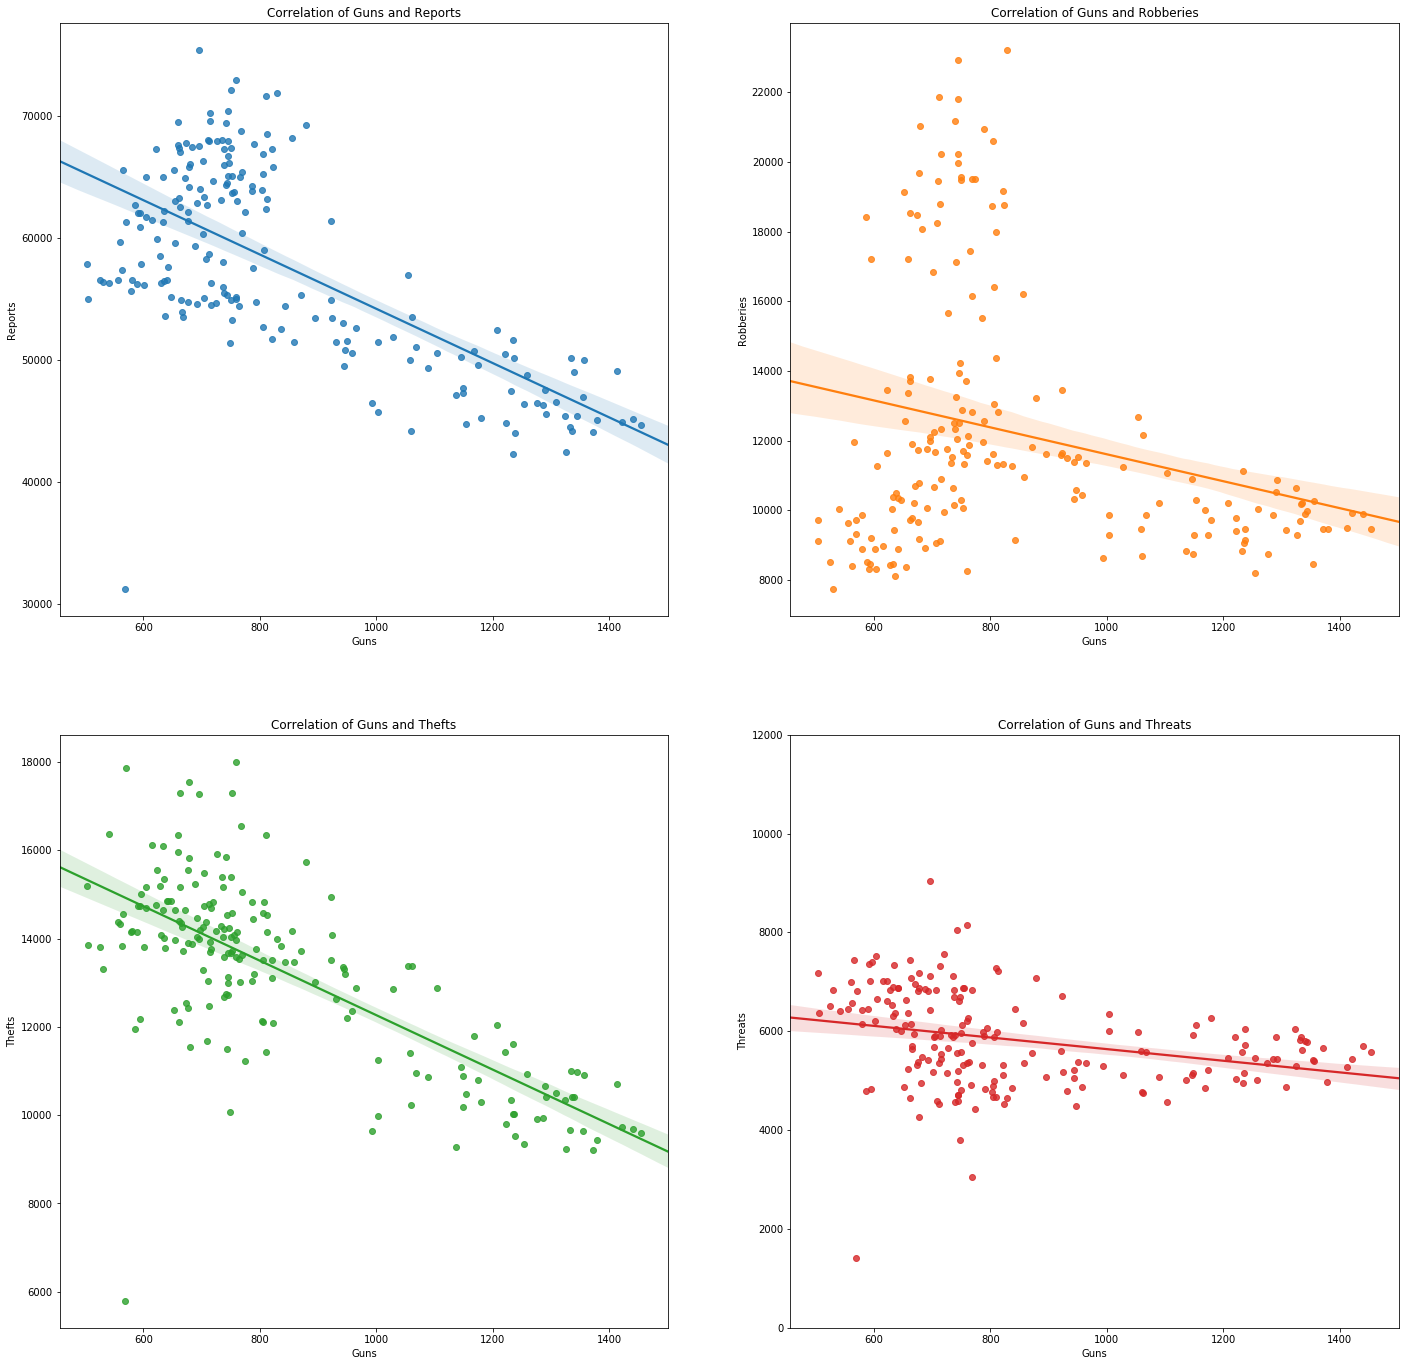

In [30]:
# Plot the regression plot for Guns and Thefts
# Plot the variables each on its own plot

fig = plt.figure(figsize = (24,24)) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4

# Subplot 1: Guns apprehended
sns.regplot(x="Guns", y="Reports", data=df, ax=ax0)
plt.ylim(0,)
ax0.set_title('Correlation of Guns and Reports')
ax0.set_xlabel('Guns')
ax0.set_ylabel('Reports')

# Subplot 2: Robberies reported
sns.regplot(x="Guns", y="Robberies", data=df, ax=ax1)
plt.ylim(0,)
ax1.set_title('Correlation of Guns and Robberies')
ax1.set_xlabel('Guns')
ax1.set_ylabel('Robberies')

# Subplot 3: Thefts reported
sns.regplot(x="Guns", y="Thefts", data=df, ax=ax2)
plt.ylim(0,)
ax2.set_title('Correlation of Guns and Thefts')
ax2.set_xlabel('Guns')
ax2.set_ylabel('Thefts')

# Subplot 4: Threats reported
sns.regplot(x="Guns", y="Threats", data=df, ax=ax3)
plt.ylim(0,12000)
ax3.set_title('Correlation of Guns and Threats')
ax3.set_xlabel('Guns')
ax3.set_ylabel('Threats')

plt.show()

# Correlation between all variables

In [17]:
# Let's see the correlation for Guns for each of the crimes
df[['Robberies', 'Thefts', 'Threats','Reports','Guns']].corr()

,Robberies,Thefts,Threats,Reports,Guns
Robberies,1.000000,0.081872,-0.403189,0.631975,-0.255823
Thefts,0.081872,1.000000,0.604089,0.718246,-0.731101
Threats,-0.403189,0.604089,1.000000,0.339211,-0.301067
Reports,0.631975,0.718246,0.339211,1.000000,-0.671801
Guns,-0.255823,-0.731101,-0.301067,-0.671801,1.000000


# Residual plot

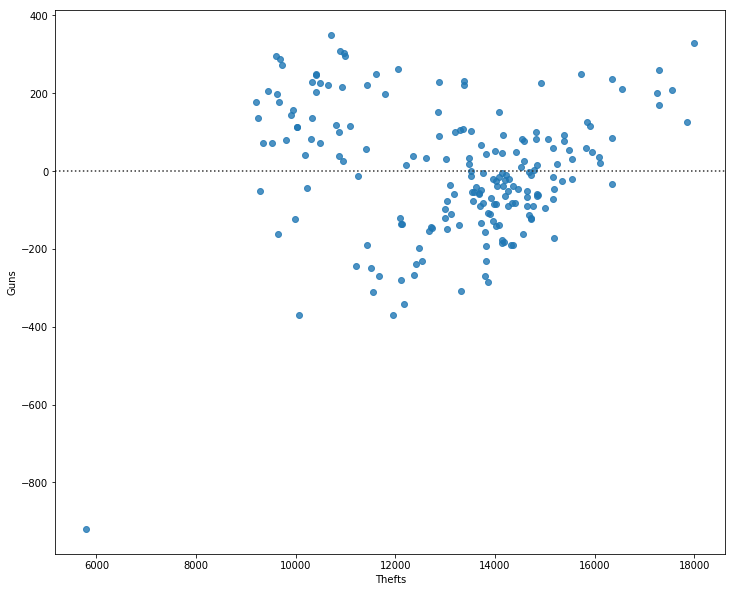

In [18]:
# Plot up a residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['Thefts'], df['Guns'])
plt.show()

# Plot with all variables on the same plot

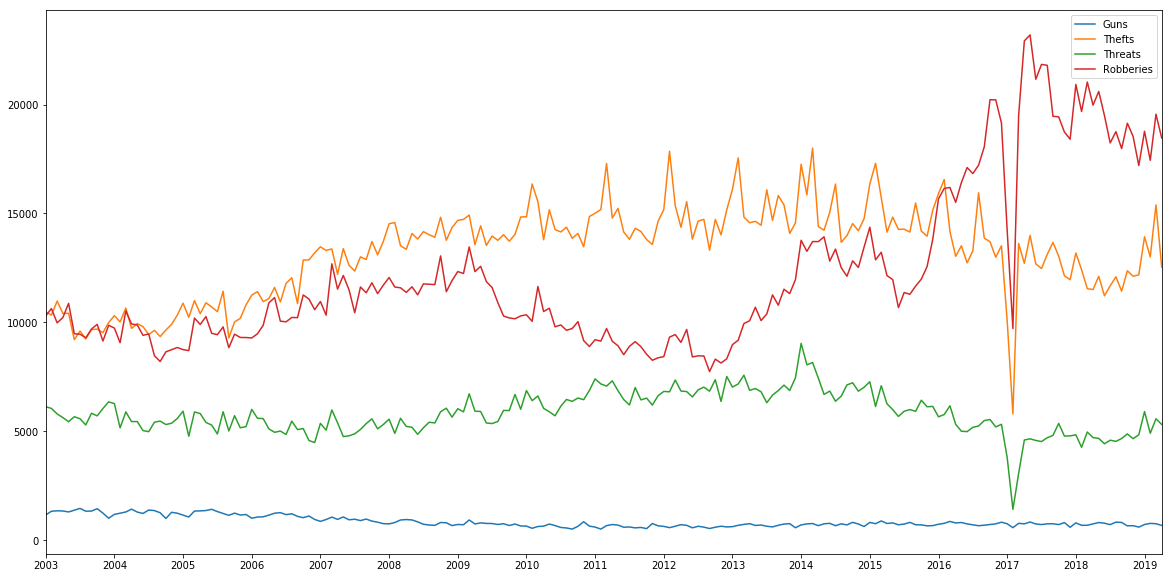

In [19]:
# Plot all variables on the same plot
df[['Guns','Thefts', 'Threats', 'Robberies']].plot(figsize=(20, 10))
unique_years, ind = np.unique(df["Year"].values,return_index=True)
plt.xticks(df.index[ind], unique_years)
plt.show()

# Plot with each variable in its own plot

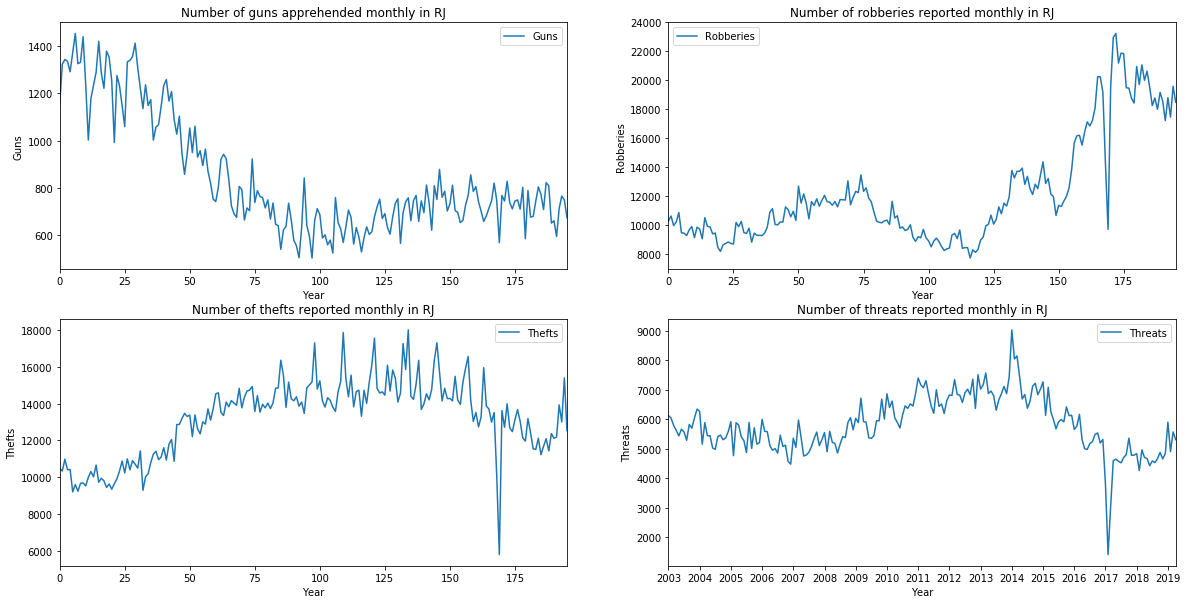

In [20]:
# Plot the variables each on its own plot

fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4
years = [2003,2005,2007,2009,2011,2013,2015,2017,2019]

# Subplot 1: Guns apprehended
df[['Guns']].plot(figsize=(20, 10), ax=ax0)
ax0.set_title('Number of guns apprehended monthly in RJ')
ax0.set_xlabel('Year')
ax0.set_ylabel('Guns')

# Subplot 2: Robberies reported
df[['Robberies']].plot(figsize=(20, 10), ax=ax1)
ax1.set_title('Number of robberies reported monthly in RJ')
ax1.set_xlabel('Year')
ax1.set_ylabel('Robberies')

# Subplot 3: Thefts reported
df[['Thefts']].plot(figsize=(20, 10), ax=ax2)
ax2.set_title('Number of thefts reported monthly in RJ')
ax2.set_xlabel('Year')
ax2.set_ylabel('Thefts')

# Subplot 4: Threats reported
df[['Threats']].plot(figsize=(20, 10), ax=ax3)
ax3.set_title('Number of threats reported monthly in RJ')
ax3.set_xlabel('Year')
ax3.set_ylabel('Threats')


ax0.set_xticklabels(years)
ax1.set_xticklabels(years)
ax2.set_xticklabels(years)
ax3.set_xticklabels(years)



plt.show()

# Checking the Pearson Correlation and P-Value

In [21]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['Guns'], df['Thefts'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.7311007989079222  with a P-value of P =  4.775783191642987e-34


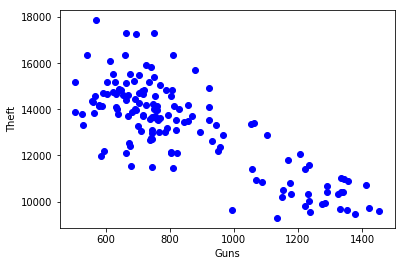

In [36]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

plt.scatter(train.Guns, train.Thefts,  color='blue')
plt.xlabel("Guns")
plt.ylabel("Theft")
plt.show()

Text(0, 0.5, 'Emission')

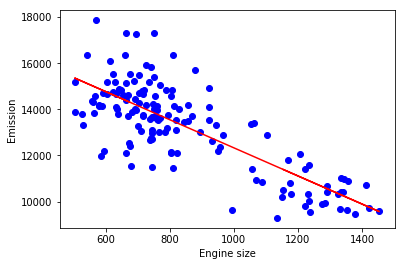

In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Guns']])
train_y = np.asanyarray(train[['Thefts']])
regr.fit (train_x, train_y)


plt.scatter(train.Guns, train.Thefts,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Theft Mean absolute error: 1224.12
Theft Residual sum of squares (MSE): 3901478.64
Theft R2-score: -0.83
Reports Mean absolute error: 5179.82
Reports Residual sum of squares (MSE): 52466621.01
Reports R2-score: -0.89
Robbery Mean absolute error: 2452.89
Robbery Residual sum of squares (MSE): 10008816.23
Robbery R2-score: -12.58
Threat Mean absolute error: 806.07
Threat Residual sum of squares (MSE): 1269338.43
Threat R2-score: -12.40


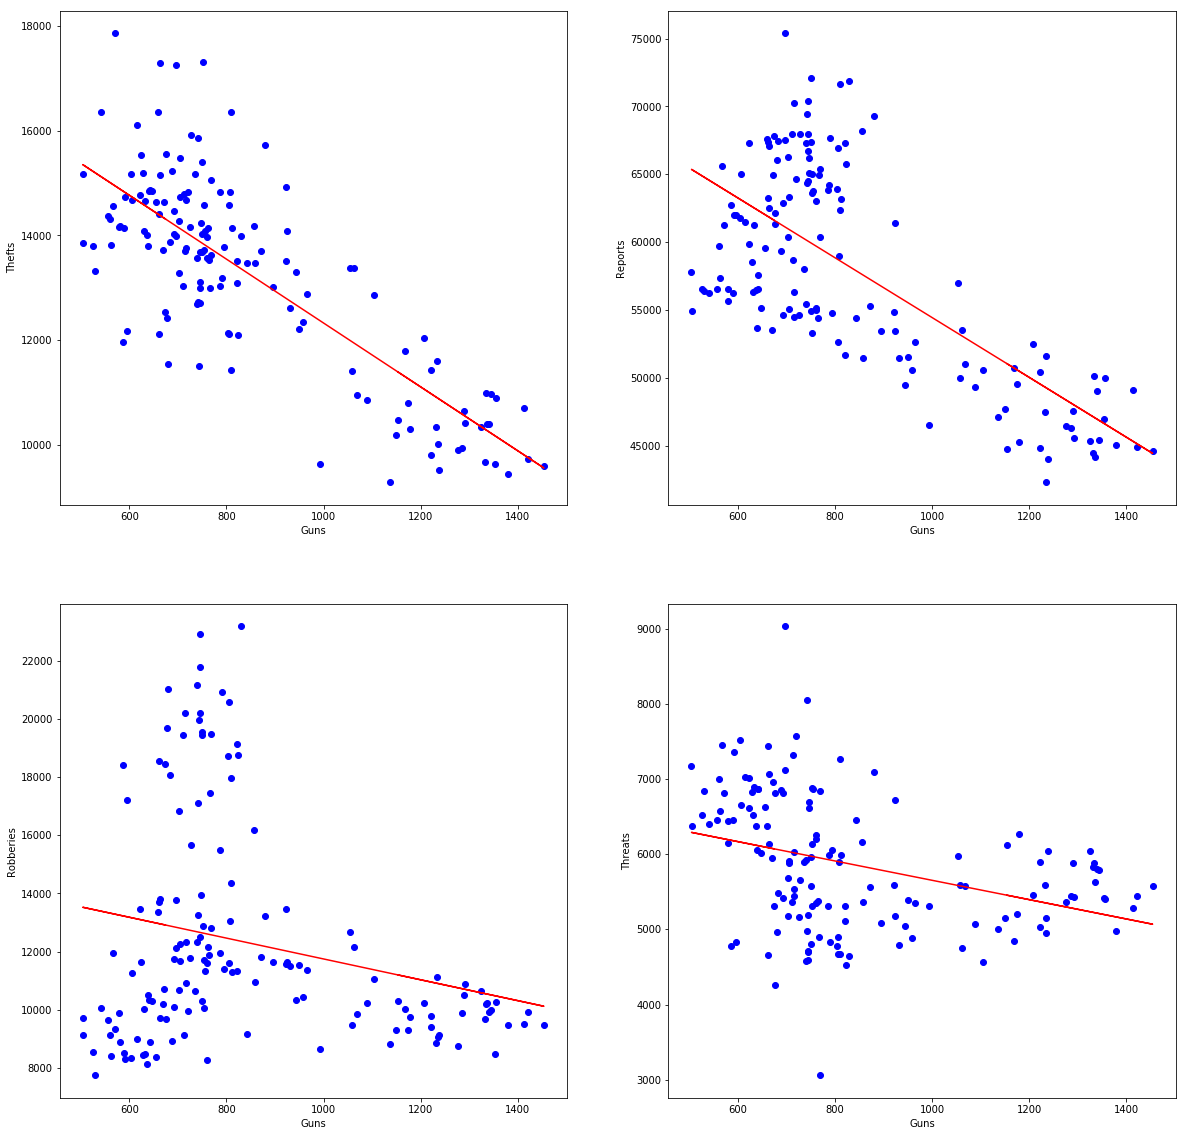

In [53]:
# Plot the variables each on its own plot

fig = plt.figure(figsize=(20,20)) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4
regr = linear_model.LinearRegression()



# Subplot 1: Guns and Thefts
train_x = np.asanyarray(train[['Guns']])
train_y = np.asanyarray(train[['Thefts']])
regr.fit (train_x, train_y)

test_x = np.asanyarray(test[['Guns']])
test_y = np.asanyarray(test[['Thefts']])
test_y_hat = regr.predict(test_x)

print("Theft Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Theft Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("Theft R2-score: %.2f" % r2_score(test_y_hat , test_y) )

ax0.scatter(train.Guns, train.Thefts,  color='blue')
ax0.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
ax0.set_xlabel("Guns")
ax0.set_ylabel("Thefts")


# Subplot 2: Guns and Reports
train_x = np.asanyarray(train[['Guns']])
train_y = np.asanyarray(train[['Reports']])
regr.fit (train_x, train_y)

test_x = np.asanyarray(test[['Guns']])
test_y = np.asanyarray(test[['Reports']])
test_y_hat = regr.predict(test_x)

print("Reports Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Reports Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("Reports R2-score: %.2f" % r2_score(test_y_hat , test_y) )

ax1.scatter(train.Guns, train.Reports,  color='blue')
ax1.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
ax1.set_xlabel("Guns")
ax1.set_ylabel("Reports")


# Subplot 3: Guns and Robberies
train_x = np.asanyarray(train[['Guns']])
train_y = np.asanyarray(train[['Robberies']])
regr.fit (train_x, train_y)

test_x = np.asanyarray(test[['Guns']])
test_y = np.asanyarray(test[['Robberies']])
test_y_hat = regr.predict(test_x)

print("Robbery Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Robbery Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("Robbery R2-score: %.2f" % r2_score(test_y_hat , test_y) )

ax2.scatter(train.Guns, train.Robberies,  color='blue')
ax2.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
ax2.set_xlabel("Guns")
ax2.set_ylabel("Robberies")


# Subplot 4: Guns and Threats
train_x = np.asanyarray(train[['Guns']])
train_y = np.asanyarray(train[['Threats']])
regr.fit (train_x, train_y)

test_x = np.asanyarray(test[['Guns']])
test_y = np.asanyarray(test[['Threats']])
test_y_hat = regr.predict(test_x)

print("Threat Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Threat Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("Threat R2-score: %.2f" % r2_score(test_y_hat , test_y) )

ax3.scatter(train.Guns, train.Threats,  color='blue')
ax3.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
ax3.set_xlabel("Guns")
ax3.set_ylabel("Threats")



plt.show()

In [51]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Guns']])
test_y = np.asanyarray(test[['Thefts']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 7194.37
Residual sum of squares (MSE): 56856102.00
R2-score: -599.21
